In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.feature_selection import VarianceThreshold  # 导入python的相关模块
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as ACCS
import pandas as pd
from sklearn import tree
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# open up a datastore
store1 = pd.HDFStore('test_data.h5')
store = pd.HDFStore('train_data.h5')

# Get the feature matrix (samples and their features)

feature_matrix_dataframe_train = store['rpkm']  # train的数据
feature_matrix_dataframe_test = store1['rpkm']  # test的数据框架


#合并原来的train label series和rpkm dataframe为了后来的筛选

labels_series_train = store['labels'] #提取H5镜像文件的labels

feature_matrix_dataframe_train['labels'] = labels_series_train 

Test_cell_types = [
         'CL:0000353 blastoderm cell',
         'CL:0002322 embryonic stem cell',
         'UBERON:0002107 liver',
         'UBERON:0001851 cortex',
         'UBERON:0000115 lung epithelium',
         'UBERON:0000922 embryo',
         'CL:0000746 cardiac muscle cell',
         "UBERON:0001954 Ammon's horn",
         'CL:0000037 hematopoietic stem cell',
         'UBERON:0000044 dorsal root ganglion',
         'CL:0002321 embryonic cell',
         'UBERON:0001003 skin epidermis',
         'CL:0002319 neural cell',
         'UBERON:0002048 lung',
         'CL:0000137 osteocyte',
         'UBERON:0001898 hypothalamus',
         'CL:0000540 neuron',
         'UBERON:0001264 pancreas',
         'CL:0000235 macrophage',
         'UBERON:0000955 brain',
         'UBERON:0000966 retina']

feature_matrix_dataframe = feature_matrix_dataframe_train[feature_matrix_dataframe_train.labels.isin(Test_cell_types)] #筛选

In [11]:
# csv_file_train = "new_train_with label.csv"
# csv_data_train = pd.read_csv(csv_file_train, header=None, low_memory = False)#防止弹出警告
# print(type(csv_data_train))
# print(csv_data_train.values[:3, :4])



<class 'pandas.core.frame.DataFrame'>
[['0' 0.0 1.0 2.0]
 ['CL:0000353 blastoderm cell' 0.0 0.0 8.286854145]
 ['CL:0000353 blastoderm cell' 0.0 0.0 8.073046961000001]]


In [13]:
# print(type(csv_data_train))
# print(csv_data_train.values[:3, :4])
# print(type(csv_data_train.values[0, 0]))
# print(type(eval(csv_data_train.values[0, 0])))

<class 'str'>
<class 'int'>


In [8]:


#提取筛选后的train数据框架的labels
labels_series = feature_matrix_dataframe['labels']
# labels_series.to_csv('labels_series.csv')
print(labels_series.shape)

train_data_lab = labels_series.values 


#去除原来的labels，只剩下纯纯的train feature
feature_matrix_dataframe.drop(columns=['labels'],inplace = True)  # train的数据框架

#提取test中的labels
labels_series1 = store1['labels']
# labels_series1.to_csv('labels_series1.csv')
print(labels_series1.shape)

test_data_lab = labels_series1.values         #test data label

#合并labels为了Kbest
all_label = pd.concat([labels_series,labels_series1],axis=0,join='inner')
# print ("all_label")
# print (all_label.shape)

#合并筛选后的train feature，和test数据集的features
all_in = pd.concat([feature_matrix_dataframe,feature_matrix_dataframe_test],axis=0,join='inner')
# print ("all_features")
# print (all_in.shape)

#apply to extract 10000 best related gene for all dataset
X = all_in
y = all_label
feature_matrix_dataframe_new_np = SelectKBest(chi2, k=1000).fit_transform(X, y)
# print (feature_matrix_dataframe_new_np.shape)
# print (type(feature_matrix_dataframe_new_np))

feature_matrix_dataframe_new = pd.DataFrame(feature_matrix_dataframe_new_np)
# print (type(feature_matrix_dataframe_new))
# print (feature_matrix_dataframe_new.shape)

#feature_matrix_dataframe_new提取出来的是所有数据集里面的最佳featurestop5000.

#low variance filter
name=feature_matrix_dataframe_new.index.values   #提取行标签


data=feature_matrix_dataframe_new.values  #提取数据丢掉标签（总和数据）
sel=VarianceThreshold(threshold=15)  #表示剔除特征的方差小于阈值 i的feature
new=sel.fit_transform(data)#返回的结果为选择的特征矩阵
new_all=pd.DataFrame(new,index=name) #得到只剩下feature的新数据
new_train = new_all.iloc[:10944,]  #新的train数据 
new_test = new_all.iloc[10944: ,]  #新的test数据

# print (new_all.shape)
#10944 是筛选后的cell 的数量。
    #注意，新数据的gene序列（columns）被抹掉了，但是这不重要
    #唯一的问题是所有的数据一起提取方差了

pca = decomposition.PCA(n_components = 100)  #降维在40-50间效果最好
new_train_afterPCA = pca.fit_transform(new_train.values)
new_test_afterPCA = pca.transform(new_test.values)
#降维
new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)


new_train_afterPCA_da.to_csv('new_train_afterPCA_da.csv', index=False, header=True)
new_test_afterPCA_da.to_csv('new_test_afterPCA_da.csv', index=False, header=True)


print(new_train_afterPCA_da.shape)
print(new_test_afterPCA_da.shape)

print(new_train_afterPCA_da.shape[0])
print(new_train_afterPCA_da.shape[1])

(10944,)
(2855,)


c:\users\sheaw\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(10944, 100)
(2855, 100)
10944
100


In [30]:
# csv_file_train = "new_train_afterPCA_da.csv"
# csv_data_train = pd.read_csv(csv_file_train, header=None, low_memory = False)#防止弹出警告
# print(type(csv_data_train))
# print(csv_data_train.values[:3, :4])
# print(type(csv_data_train.values[0, 0]))
# print(type(csv_data_train.values[0, 1]))
# print(type(eval(csv_data_train.values[0, 0])))

<class 'pandas.core.frame.DataFrame'>
[['1000' 0.0 1.0 2.0]
 ['CL:0000353 blastoderm cell' -1109.906785 -330.5302563 -318.1418921]
 ['CL:0000353 blastoderm cell' -1104.1248050000002 -317.1948579
  -349.57658639999994]]
<class 'str'>
<class 'float'>
<class 'int'>


In [52]:
# csv_file_test = "new_test_afterPCA_da.csv"
# csv_data_test = pd.read_csv(csv_file_test, header=None, low_memory = False)#防止弹出警告
# print(type(csv_data_test))
# print(csv_data_test.values[:3, :4])
# print(type(csv_data_test.values[0, 0]))
# print(type(csv_data_test.values[0, 1]))


<class 'pandas.core.frame.DataFrame'>
[[ 1.00000000e+03  0.00000000e+00  1.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00 -1.09681641e+03 -2.99134096e+02 -3.94577969e+02]
 [ 1.00000000e+00 -1.09693032e+03 -2.99170100e+02 -3.94036393e+02]]
<class 'numpy.float64'>
<class 'numpy.float64'>


In [53]:
# csv_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 2.2 MB


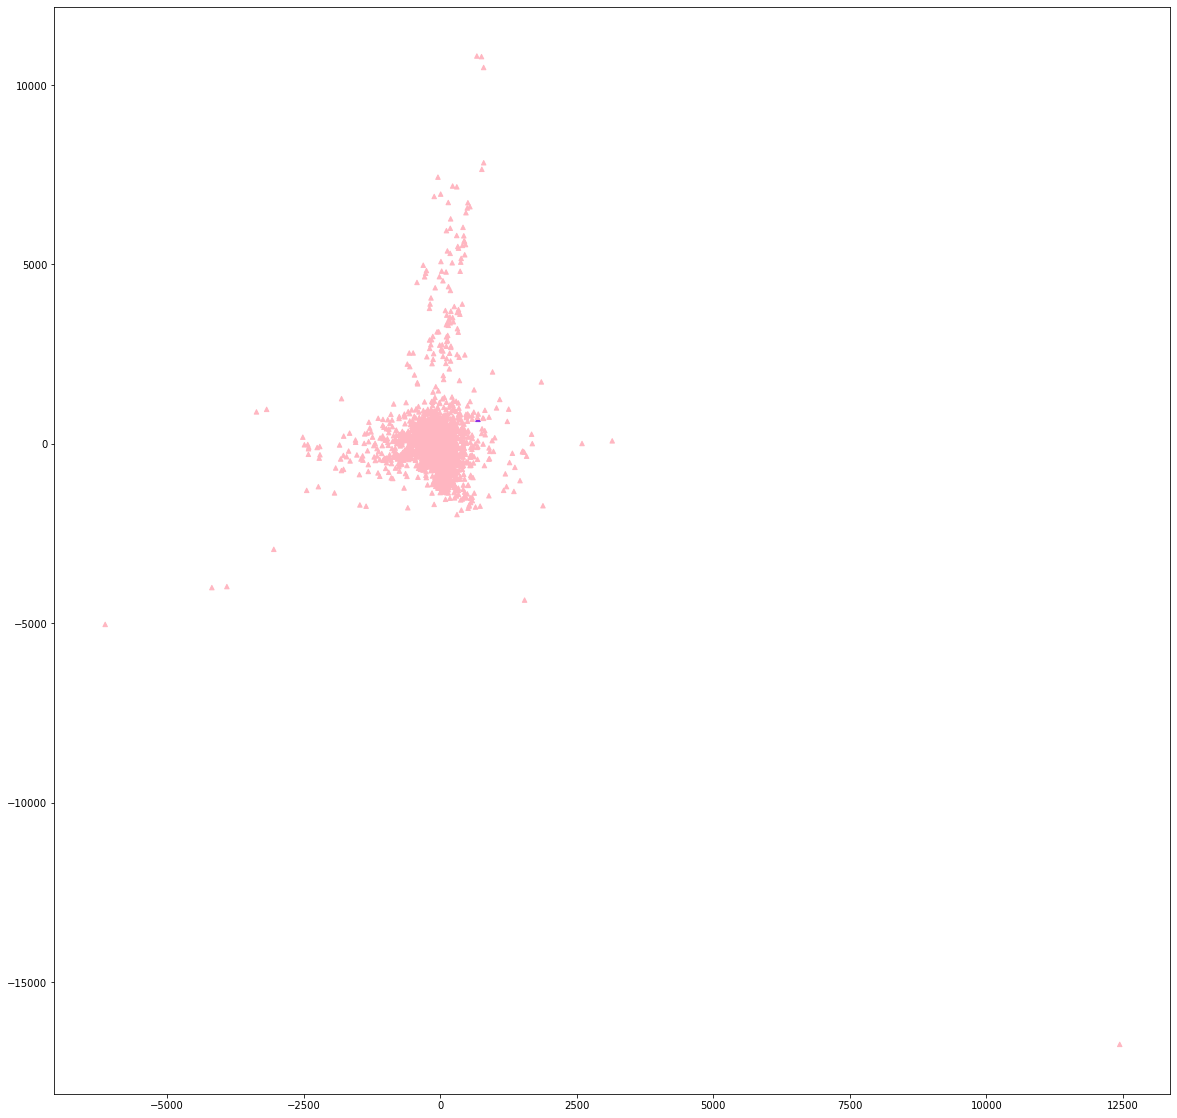

In [107]:
# import matplotlib as mpl
# plt.figure(figsize=[20,20])

# colors = ['#FFB6C1','#FF00FF','#DC143C','#FFF0F5','#DB7093','#FF69B4', '#FF1493','#C71585','#DA70D6','#D8BFD8','#DDA0DD','#EE82EE','#FF00FF','#FF00FF','#8B008B','#800080','#BA55D3','#9400D3','#9932CC','#4B0082','#8A2BE2']

# csv_file_test = "new_test_afterPCA_da.csv"


# x1 = 5 * csv_data_test.values[:, -1] + 2 * csv_data_test.values[:, -3]  #+ csv_data_test.values[:, -5] + csv_data_test.values[:, -7]csv_data_test.values[:, -2]
# x2 = 5 * csv_data_test.values[:, -2] + 2 * csv_data_test.values[:, -4]# + csv_data_test.values[:, -6] + csv_data_test.values[:, -8]csv_data_test.values[:, -1] + csv_data_test.values[:, -4]

# csv_data_test = pd.read_csv(csv_file_test, header=None, low_memory = False)#防止弹出警告
# plt.scatter(x= x1, y=x2, c = csv_data_test.values[:, 0], marker = '^', s = 20, cmap=mpl.colors.ListedColormap(colors))
# plt.show()

In [2]:
# csv_data_test.plot(kind='scatter', x = 99, y = 98, s = 1000, c = '1000', label = 1000, figsize = (12, 9), alpha = 0.4, cmap = plt.get_cmap('rainbow'))
# plt.show()

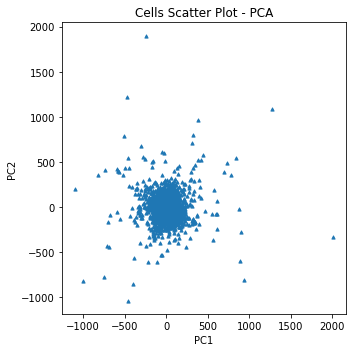

In [9]:
# Visualization
# print(new_train.shape)
# print(new_train.index[:4])
# print(new_train.values[:4, :4])

# pca = decomposition.PCA(n_components=100)
# new_train_afterPCA = pca.fit_transform(new_train.values)
# new_test_afterPCA = pca.transform(new_test.values)
# # 降维

# # print(new_train_afterPCA.shape)
# # print(new_train_afterPCA[:4, :4])

# new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
# new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)


# print(new_train_afterPCA_da.shape)
# print(new_train_afterPCA_da.index[:4])
# print(new_train_afterPCA_da.values[:4, :4])

# print(new_train_afterPCA_da.shape)
# print(new_train_afterPCA_da.values[:4, :])
# print(new_train_afterPCA[:4, :])

fig, ax = plt.subplots(1, figsize=(5,5))
ax.scatter(new_train_afterPCA_da.values[:,-2], new_train_afterPCA_da.values[:,-1], marker = '^', s=10)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cells Scatter Plot - PCA')

fig.tight_layout()

Text(678.1249999999999, 0.5, 'Cells (1000)')

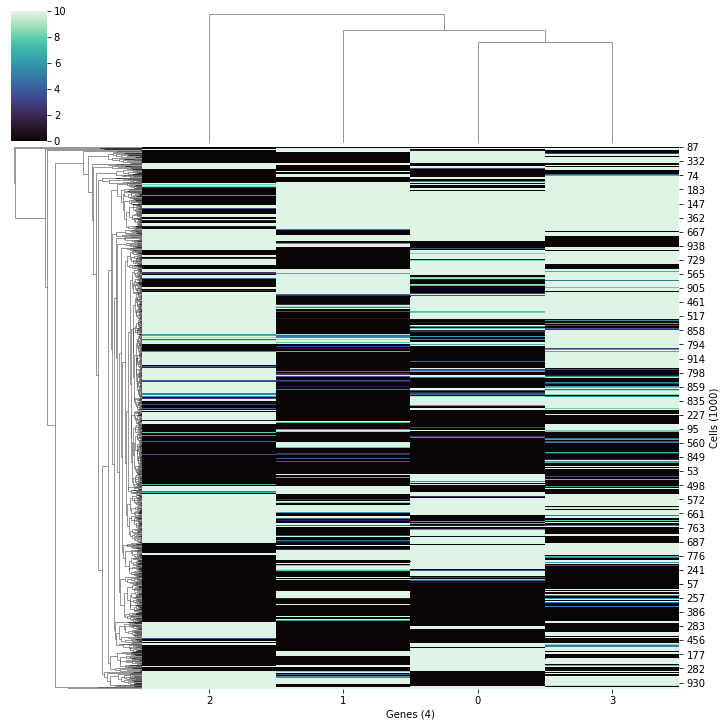

In [10]:
import seaborn as sns


X = new_train_afterPCA_da.values[:1000, -5:-1]
Y = pd.DataFrame(X, index = new_train_afterPCA_da.index.values[:1000])

# print(new_train_afterPCA.shape)
# print(new_train_afterPCA[:4, :4])

# new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
# new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)

cg = sns.clustermap(Y, cmap="mako", vmin=0, vmax=10)
# cg = sns.clustermap(Y, cmap='prism', xticklabels=[], yticklabels=[])
cg.ax_heatmap.set_xlabel('Genes ({})'.format(Y.shape[1]))
cg.ax_heatmap.set_ylabel('Cells ({})'.format(Y.shape[0]))

In [ ]:
import matplotlib as mpl

plt.figure(figszize=[12, 8])
plt.scatter(x=store[])